# CE-40550 Machine Learning for Bioinformatics (25 points)
## Deadline: 9th Ordibehesht
Predicting protein secondary structure is a fundamental problem in bioinformatics. 
In this homework we are going to predict local secondary structure with deep
hierarchical representations. We are going to use tf.keras API in order to complete the tasks. Please read the [documentation](https://www.tensorflow.org/guide/keras) carefully before you proceed.

In [0]:
# importing modules
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Data Description and Preprocessing

You can download the dataset from [here](https://www.princeton.edu/~jzthree/datasets/ICML2014/cullpdb+profile_6133.npy.gz). This dataset consists of 6133 protein samples. Each protein contains at most 700 amino acids. Each amino acid has 57 features in one-hot encoding scheme. In this homework we are going to predict secondary structure labels for each amino acid from amino acid sequences. For additional information you can visit [this](https://www.princeton.edu/~jzthree/datasets/ICML2014/dataset_readme.txt) page.
We have shuffled the data and took 10% of it for this homework and it is given to you as `X.npy` and `Y.npy`

### Load Data 
download the data.zip and extract it into a folder named data.

In [7]:
!unzip "/data.zip"

Archive:  /data.zip
  inflating: X.npy                   
  inflating: Y.npy                   


In [0]:
from sklearn.model_selection import train_test_split
# load data
X = np.load('X.npy')
Y = np.load('Y.npy')
# we take 15% of the data as test and the rest as train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [23]:
# check the shape of train and test data
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100838, 15, 21)
(100838, 8)
(17796, 15, 21)
(17796, 8)


## Building a model

In your first assingment you are going to build a (1D) convolutional network with the following structure:  
32 * CONV3 -> 32 * CONV3 -> MAX-POOL2 ->  
64 * CONV3 -> 64 * CONV3 -> MAX-POOL2 ->  
128 * CONV3 -> 128 * CONV3 -> MAX-POOL2 ->  
FLATTEN -> DENSE(64) -> DENSE(8)  
All convolution and pooling layers are 1-dimensional. Set the stride of pooling layers to 2. Set the kernel size of pooling layers to 2. All convolutional layers have the kernel size = 3. Use RELU activation function for the network. Set the padding of conv and pool layers to same. Initialize all kernel weights with glorot uniform initializer.

In [0]:
# from tf.keras.layers import Conv1D, MaxPooling1D

model = tf.keras.Sequential()
############################################################
# TODO: Build the model described above                    #
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_train.shape[1:], 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(layers.MaxPooling1D(pool_size=2, strides=2, padding='same'))

model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(layers.MaxPooling1D(pool_size=2, strides=2, padding='same'))

model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu', 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu', 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(layers.MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))
############################################################
#                     End of your code                     #
############################################################

In [25]:
# you can see a summary of the structure and parameters of your model here
# you must pass input shape to input_shape in the first layer of the model 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_30 (Conv1D)           (None, 15, 32)            2048      
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 15, 32)            3104      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 8, 32)             0         
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 8, 64)             6208      
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 8, 64)             12352     
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 4, 64)             0         
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 4, 128)            24704     
__________

### Compile the model and Fit
Compile the model and fit it to the training data. 

In [26]:
history = None
####################################################################
# TODO:compile your model with Adagrad optimizer.                  #
# Use accuracy as metrics and categorical cross entropy loss       #
# set learning rate to 0.01                                        #
# fit the model to the train data.                                 #
# use 10% of the data as validation                                #
# train the model for 25 epochs and set the batch size to 256      #
# save the result of model.fit to history variable                 #
####################################################################
adg = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=adg,
              metrics=['acc'])

history = model.fit(X_train, Y_train, batch_size=256, epochs=25, validation_split=0.1)
####################################################################
#                        End of your code                          #
####################################################################

Train on 90754 samples, validate on 10084 samples
Epoch 1/25
90754/90754 [==============================] - 3s 32us/sample - loss: 1.5035 - acc: 0.4273 - val_loss: 1.3929 - val_acc: 0.4763
Epoch 2/25
90754/90754 [==============================] - 2s 25us/sample - loss: 1.3571 - acc: 0.4956 - val_loss: 1.3356 - val_acc: 0.5053
Epoch 3/25
90754/90754 [==============================] - 2s 26us/sample - loss: 1.3134 - acc: 0.5171 - val_loss: 1.2962 - val_acc: 0.5241
Epoch 4/25
90754/90754 [==============================] - 2s 26us/sample - loss: 1.2897 - acc: 0.5274 - val_loss: 1.2833 - val_acc: 0.5287
Epoch 5/25
90754/90754 [==============================] - 2s 26us/sample - loss: 1.2749 - acc: 0.5323 - val_loss: 1.2985 - val_acc: 0.5193
Epoch 6/25
90754/90754 [==============================] - 2s 25us/sample - loss: 1.2623 - acc: 0.5379 - val_loss: 1.2625 - val_acc: 0.5384
Epoch 7/25
90754/90754 [==============================] - 2s 25us/sample - loss: 1.2524 - acc: 0.5424 - val_loss: 1.

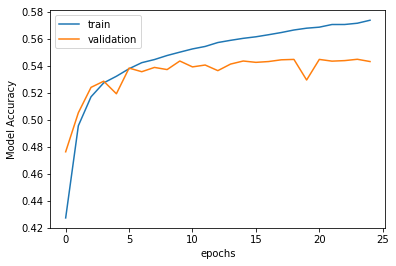

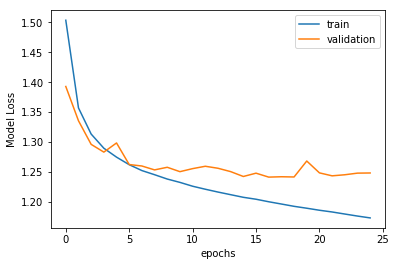

In [27]:
# you can plot the accuracy as well as loss of the model
# on the training data and validation data in epochs
def plot_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.xlabel('epochs'), plt.ylabel('Model Accuracy')
    plt.legend(), plt.show()
    plt.figure()
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.xlabel('epochs'), plt.ylabel('Model Loss')
    plt.legend(), plt.show()
    
plot_history(history)

#### Question: what do you see in the plots?

As we can see in the plots, after almost 3 or 4 epochs, the model accuracy for validation data will not increase (ans the loss will not decrease either). But the model accuracy and loss for train data are getting better. If we look closely, the model loss for validation data is nosiy and it is increasing a little bit at the end. (and also the model accuracy is decreasing a bit) 
This means that the model is overfitting and our hypothesis space is bigger than what it should be or the number of parameters are more than what the problem actually needs because the model loss for train data is increasing.

In [28]:
####################################################################
# TODO:evaluate the model on the test data                         #
####################################################################

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print("Test acc: ", test_acc)
print("Test loss: ", test_loss)

####################################################################
#                        End of your code                          #
####################################################################

17796/17796 [==============================] - 1s 73us/sample - loss: 1.2556 - acc: 0.5366
Test acc:  0.5366374
Test loss:  1.2556152056511614


## Regularization

### L2 penalty
Build the same model as previous part but add l2 penalty to the last 2 convolution layers and the first dense layer. You are free to choose weight-decay(regularization coef).

In [30]:
####################################################################
# TODO: build a model with the same structure                      #
#       add l2 penalty to last 2 conv layers and                   #
#       the first dense layer                                      #
####################################################################

from tensorflow.keras.regularizers import l2

kernel_penalty = 0.001
bias_penalty = 0.001

model = tf.keras.Sequential()

model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_train.shape[1:], 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(layers.MaxPooling1D(pool_size=2, strides=2, padding='same'))

model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(layers.MaxPooling1D(pool_size=2, strides=2, padding='same'))

model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu', 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform', 
                        kernel_regularizer=l2(kernel_penalty)))
model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu', 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform',
                        kernel_regularizer=l2(kernel_penalty)))
model.add(layers.MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(kernel_penalty)))
model.add(layers.Dense(8, activation='softmax'))

model.summary()

####################################################################
#                        End of your code                          #
####################################################################

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_42 (Conv1D)           (None, 15, 32)            2048      
_________________________________________________________________
conv1d_43 (Conv1D)           (None, 15, 32)            3104      
_________________________________________________________________
max_pooling1d_21 (MaxPooling (None, 8, 32)             0         
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 8, 64)             6208      
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 8, 64)             12352     
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 4, 64)             0         
_________________________________________________________________
conv1d_46 (Conv1D)           (None, 4, 128)            24704     
__________

In [31]:
####################################################################
# TODO:compile your model with Adagrad optimizer.                  #
# Use accuracy as metrics and categorical cross entropy loss       #
# set learning rate to 0.01                                        #
# fit the model to the train data.                                 #
# use 10% of the data as validation                                #
# train the model for 25 epochs and set the batch size to 256      #
# save the result of model.fit to history variable                 #
####################################################################

adg = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=adg,
              metrics=['acc'])

history_reg = model.fit(X_train, Y_train, batch_size=256, epochs=25, validation_split=0.1)

####################################################################
#                        End of your code                          #
####################################################################

Train on 90754 samples, validate on 10084 samples
Epoch 1/25
90754/90754 [==============================] - 3s 33us/sample - loss: 1.5976 - acc: 0.4128 - val_loss: 1.4487 - val_acc: 0.4732
Epoch 2/25
90754/90754 [==============================] - 2s 26us/sample - loss: 1.4312 - acc: 0.4793 - val_loss: 1.4099 - val_acc: 0.4847
Epoch 3/25
90754/90754 [==============================] - 2s 27us/sample - loss: 1.3887 - acc: 0.4970 - val_loss: 1.3818 - val_acc: 0.4922
Epoch 4/25
90754/90754 [==============================] - 2s 26us/sample - loss: 1.3614 - acc: 0.5104 - val_loss: 1.3446 - val_acc: 0.5155
Epoch 5/25
90754/90754 [==============================] - 2s 27us/sample - loss: 1.3421 - acc: 0.5178 - val_loss: 1.3378 - val_acc: 0.5211
Epoch 6/25
90754/90754 [==============================] - 3s 28us/sample - loss: 1.3273 - acc: 0.5247 - val_loss: 1.3224 - val_acc: 0.5241
Epoch 7/25
90754/90754 [==============================] - 3s 28us/sample - loss: 1.3159 - acc: 0.5296 - val_loss: 1.

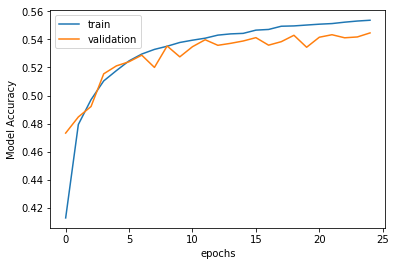

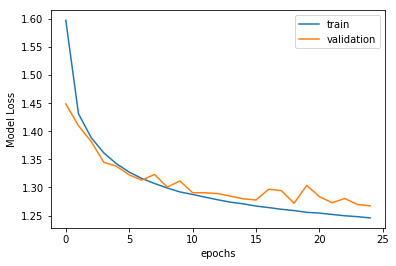

In [32]:
# plot the accuracy and loss during training
plot_history(history_reg)

In [40]:
####################################################################
# TODO:evaluate the model on the test data                         #
####################################################################

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print("Test acc: ", test_acc)
print("Test loss: ", test_loss)

####################################################################
#                        End of your code                          #
####################################################################

17796/17796 [==============================] - 1s 81us/sample - loss: 1.3427 - acc: 0.5152


### Dropout
Add a dropout layer between the two dense layers and compare your results with the previous part.

In [33]:
####################################################################
# TODO: build a model with the same structure                      #
#       add a dropout layer after the first dense layer            #
#       set the rate to 0.5                                        #
####################################################################

from tensorflow.keras.regularizers import l2

model = tf.keras.Sequential()

model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_train.shape[1:], 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(layers.Conv1D(filters=32, kernel_size=3, activation='relu', 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(layers.MaxPooling1D(pool_size=2, strides=2, padding='same'))

model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform'))
model.add(layers.MaxPooling1D(pool_size=2, strides=2, padding='same'))

model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu', 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform'))
#                         kernel_regularizer=l2(kernel_penalty)))
model.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu', 
                        padding='same', use_bias=True, kernel_initializer='glorot_uniform'))
#                         kernel_regularizer=l2(kernel_penalty)))
model.add(layers.MaxPooling1D(pool_size=2, strides=2, padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=l2(kernel_penalty)))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

model.summary()

####################################################################
#                        End of your code                          #
####################################################################

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_48 (Conv1D)           (None, 15, 32)            2048      
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 15, 32)            3104      
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 8, 32)             0         
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 8, 64)             6208      
_________________________________________________________________
conv1d_51 (Conv1D)           (None, 8, 64)             12352     
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 4, 64)             0         
_________________________________________________________________
conv1d_52 (Conv1D)           (None, 4, 128)            24704     
__________

In [34]:
####################################################################
# TODO:compile your model with Adagrad optimizer.                  #
# Use accuracy as metrics and categorical cross entropy loss       #
# set learning rate to 0.01                                        #
# fit the model to the train data.                                 #
# use 10% of the data as validation                                #
# train the model for 50 epochs and set the batch size to 256      #
# save the result of model.fit to history variable                 #
####################################################################

adg = tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)
model.compile(loss='categorical_crossentropy',
              optimizer=adg,
              metrics=['acc'])

history_drop = model.fit(X_train, Y_train, batch_size=256, epochs=25, validation_split=0.1)

####################################################################
#                        End of your code                          #
####################################################################

Train on 90754 samples, validate on 10084 samples
Epoch 1/25
90754/90754 [==============================] - 3s 35us/sample - loss: 1.5717 - acc: 0.4173 - val_loss: 1.4082 - val_acc: 0.4773
Epoch 2/25
90754/90754 [==============================] - 3s 28us/sample - loss: 1.4119 - acc: 0.4888 - val_loss: 1.3438 - val_acc: 0.5050
Epoch 3/25
90754/90754 [==============================] - 2s 26us/sample - loss: 1.3672 - acc: 0.5096 - val_loss: 1.3151 - val_acc: 0.5165
Epoch 4/25
90754/90754 [==============================] - 2s 27us/sample - loss: 1.3442 - acc: 0.5187 - val_loss: 1.3000 - val_acc: 0.5280
Epoch 5/25
90754/90754 [==============================] - 2s 27us/sample - loss: 1.3260 - acc: 0.5266 - val_loss: 1.3102 - val_acc: 0.5257
Epoch 6/25
90754/90754 [==============================] - 2s 26us/sample - loss: 1.3120 - acc: 0.5316 - val_loss: 1.2934 - val_acc: 0.5324
Epoch 7/25
90754/90754 [==============================] - 2s 26us/sample - loss: 1.3054 - acc: 0.5359 - val_loss: 1.

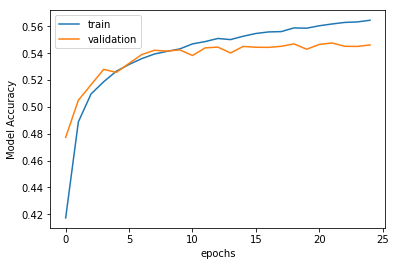

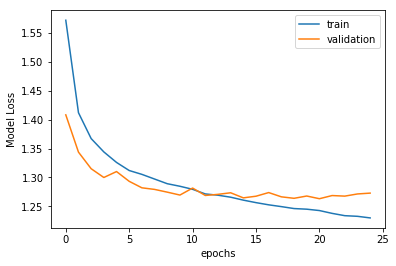

In [35]:
# plot the accuracy and loss during training
plot_history(history_drop)

#### Question: what is the result of using dropout?

As we can see in the figures, by adding dropout, model loss for train data is not increased after a number of epochs, therefore we are not overfitting anymore. This happens because dropout prevents overfitting due to a layer's "over-reliance" on a few of its inputs. Because these inputs are not always present during training. so the layer learns to use all of its inputs, and therefore improves the model'sgeneralization.

In [36]:
####################################################################
# TODO:evaluate the model on the test data                         #
####################################################################

test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)
print("Test acc: ", test_acc)
print("Test loss: ", test_loss)

####################################################################
#                        End of your code                          #
####################################################################

17796/17796 [==============================] - 1s 81us/sample - loss: 1.2764 - acc: 0.5330
Test acc:  0.5330411
Test loss:  1.2764115342265383
